In [1]:
import requests
import datetime as dt
import pandas
import warnings
import japanize_matplotlib
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')

In [2]:
dt_now=dt.datetime.now()
file_day=dt_now - dt.timedelta(days=1)
file_day=file_day.strftime("%Y%m%d")
#ファイルのダウンロード
url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijoukyou.xlsx'
filename=str(file_day)+'hasseijoukyou.xlsx'
urlData = requests.get(url).content
try:
  if urlData.decode().startswith('<?xml'):
    print('1')
    file_day=dt_now - dt.timedelta(days=1)
    file_day=file_day.strftime("%Y%m%d")
    url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijokyou.xlsx'
    filename=str(file_day)+'hasseijoukyou.xlsx'
    urlData = requests.get(url).content
  elif urlData.decode().startswith('<?xml'):
    print('2')
    file_day=dt_now - dt.timedelta(days=1)
    file_day=file_day.strftime("%Y%m%d")
    url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijoukyou.xlsx'
    filename=str(file_day)+'hasseijoukyou.xlsx'
    urlData = requests.get(url).content
  elif urlData.decode().startswith('<?xml'):
    print('3')
    file_day=dt_now - dt.timedelta(days=2)
    file_day=file_day.strftime("%Y%m%d")
    url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijoukyou.xlsx'
    filename=str(file_day)+'hasseijoukyou.xlsx'
    urlData = requests.get(url).content
  elif urlData.decode().startswith('<?xml'):
    print('4')
    file_day=dt_now - dt.timedelta(days=1)
    file_day=file_day.strftime("%Y%m%d")
    url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijkyou_1.xlsx'
    urlData = requests.get(url).content
    filename=str(file_day)+'hasseijkyou_1.xlsx'
  elif urlData.decode().startswith('<?xml'):
    print('5')
    file_day=dt_now - dt.timedelta(days=2)
    file_day=file_day.strftime("%Y%m%d")
    url='https://www.pref.tochigi.lg.jp/e04/welfare/hoken-eisei/kansen/hp/documents/'+str(file_day)+'hasseijkyou_1.xlsx'
    urlData = requests.get(url).content
    filename=str(file_day)+'hasseijkyou_1.xlsx'
except:
  print('例外が発生した為プログラムを実行できません.')
with open('data/'+str(filename) ,mode='wb') as f: # wb でバイト型を書き込める
  f.write(urlData)
print(filename)

1
20210826hasseijoukyou.xlsx


In [3]:
#本来はExcelデータを入力するようにする.
print(str(filename))
corona=pandas.read_excel('data/'+str(filename), header=1)
corona=corona[['番号','年代','性別','居住地','発症日','判明日','その他（＊）']]
corona=corona[corona['番号']!='※居住地にかかわらず、感染症の予防及び感染症の患者に対する医療に関する法律に基づき、栃木県及び宇都宮市に届け出のあった患者について掲載しています。（他県や検疫所に届け出があった患者は、他県等で公表されます。）\n※患者・御家族の人権尊重・個人情報保護に御理解と御配慮をお願いします。\n※退院日等の「退院」には、感染症法上の入院勧告等の解除及び県外保健所への入院等の対応依頼を含みます。\n(＊) 陽性者との接触の有無、感染に関与すると考えられる行動歴等  ']
corona=corona[corona['判明日']!='調査中']
corona=corona[corona['判明日']!='現在調査中']
corona=corona.reset_index()
for i in range(len(corona)):
    if type(corona['判明日'][i]) is int:
        corona['判明日'][i]=pandas.to_datetime('1900/1/1') + pandas.to_timedelta(corona['判明日'][i] - 1, unit='days')
#データの整形
corona=corona.dropna(how='all')
corona = corona.dropna(axis=0, subset=['番号'])
corona[corona['番号'].isnull()]
corona=corona[corona['番号']!=' ']
corona=corona.reset_index()
#当面の最終的な目標は, 2020年のデータと2021年のデータの区別ができるようにする.(暫定方法)
corona['Year']=0
corona['Month']=0
corona['判明日']=pandas.to_datetime(corona['判明日'], format='%Y-%m-%d %H:%M:%S')
corona['Year']=corona['判明日'].dt.year
corona['Month']=corona['判明日'].dt.month
corona1=corona

20210826hasseijoukyou.xlsx


<h1>全体データ</h1>

In [ ]:
corona

,level_0,index,番号,年代,性別,居住地,発症日,判明日,その他（＊）,Year,Month
0,0,0,11856,10歳未満,男性,宇都宮市,調査中,2021-08-23,※宇都宮市4315例目,2021.0,8.0
1,1,1,11855,10歳未満,女性,宇都宮市,調査中,2021-08-23,※宇都宮市4314例目,2021.0,8.0
2,2,2,11854,10歳未満,男性,宇都宮市,調査中,2021-08-23,※宇都宮市4313例目,2021.0,8.0
3,3,3,11853,40代,女性,宇都宮市,調査中,2021-08-23,※宇都宮市4312例目,2021.0,8.0
4,4,4,11852,40代,女性,宇都宮市,調査中,2021-08-23,※宇都宮市4311例目,2021.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
11844,11851,11860,4,50代,男性,県南,NaN,2020-03-21,ポルトガル旅行,2020.0,3.0
11845,11852,11861,3,40代,女性,宇都宮,NaN,2020-03-19,タイ旅行 \n※宇都宮市1例目,2020.0,3.0
11846,11853,11862,2,30代,女性,県南,NaN,2020-03-06,大阪ライブハウス、ショッピングセンター勤務,2020.0,3.0
11847,11854,11863,1,60代,女性,県南,NaN,2020-02-23,クルーズ船下船,2020.0,2.0


<h2>最新データ</h2>

In [ ]:
corona_s=corona[corona['判明日']==corona['判明日'][0]]
print(str(corona['判明日'][0])+'のデータの件数')
print(str(len(corona_s))+'件')

2021-08-23 00:00:00のデータの件数
54件


In [ ]:
corona_s

,level_0,index,番号,年代,性別,居住地,発症日,判明日,その他（＊）,Year,Month
0,0,0,11856,10歳未満,男性,宇都宮市,調査中,2021-08-23,※宇都宮市4315例目,2021.0,8.0
1,1,1,11855,10歳未満,女性,宇都宮市,調査中,2021-08-23,※宇都宮市4314例目,2021.0,8.0
2,2,2,11854,10歳未満,男性,宇都宮市,調査中,2021-08-23,※宇都宮市4313例目,2021.0,8.0
3,3,3,11853,40代,女性,宇都宮市,調査中,2021-08-23,※宇都宮市4312例目,2021.0,8.0
4,4,4,11852,40代,女性,宇都宮市,調査中,2021-08-23,※宇都宮市4311例目,2021.0,8.0
5,5,5,11851,40代,女性,宇都宮市,調査中,2021-08-23,11559例目の家族\n※宇都宮市4310例目,2021.0,8.0
6,6,6,11850,10代,男性,宇都宮市,調査中,2021-08-23,11730例目の家族\n※宇都宮市4309例目,2021.0,8.0
7,7,7,11849,40代,男性,宇都宮市,調査中,2021-08-23,11530･11565例目の家族\n※宇都宮市4308例目,2021.0,8.0
8,8,8,11848,40代,女性,宇都宮市,調査中,2021-08-23,11548例目の家族\n※宇都宮市4307例目,2021.0,8.0
9,9,9,11847,20代,女性,宇都宮市,調査中,2021-08-23,11501例目の知人\n※宇都宮市4306例目,2021.0,8.0


<h2>居住地についての可視化</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

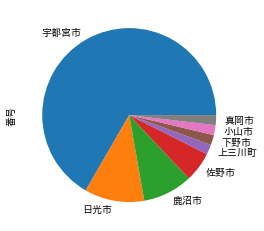

In [ ]:
corona_place=corona_s.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [ ]:
corona_place

居住地
宇都宮市    36
日光市      6
鹿沼市      5
佐野市      3
上三川町     1
下野市      1
小山市      1
真岡市      1
Name: 番号, dtype: int64

<h2>年齢についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

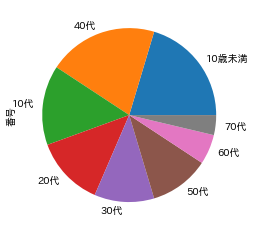

In [ ]:
corona_nen=corona_s.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [ ]:
corona_nen

年代
10歳未満    11
40代      11
10代       8
20代       7
30代       6
50代       6
60代       3
70代       2
Name: 番号, dtype: int64

<h2>性別についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

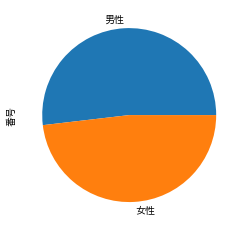

In [ ]:
corona_sei=corona_s.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)

<h2>月別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

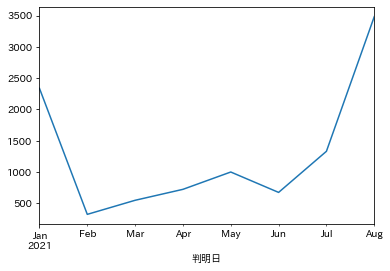

In [ ]:
#2021年のデータを対象とする.
corona=corona[corona['Year']==2021]
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['Year'].plot()

In [ ]:
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['番号']

判明日
2021-01-31    2337
2021-02-28     322
2021-03-31     547
2021-04-30     722
2021-05-31     999
2021-06-30     673
2021-07-31    1330
2021-08-31    3482
Freq: M, Name: 番号, dtype: int64

<h2>居住地についての可視化</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

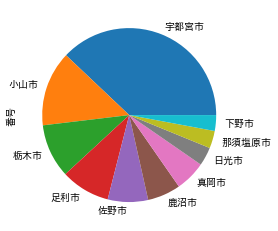

In [ ]:
corona_place=corona.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [ ]:
corona_place

居住地
宇都宮市     3322
小山市      1222
栃木市       875
足利市       800
佐野市       656
鹿沼市       540
真岡市       499
日光市       302
那須塩原市     284
下野市       257
Name: 番号, dtype: int64

<h2>年齢についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

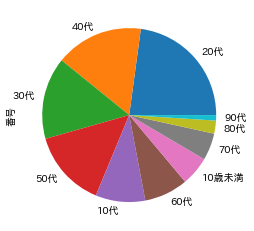

In [ ]:
corona_nen=corona.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [ ]:
corona_nen

年代
20代      2375
40代      1695
30代      1583
50代      1490
10代       959
60代       846
10歳未満     564
70代       522
80代       252
90代       105
Name: 番号, dtype: int64

<h2>性別についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

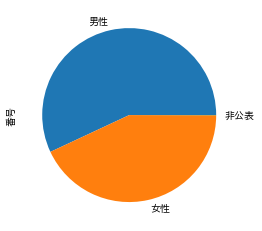

In [ ]:
corona_sei=corona.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)

In [ ]:
corona_sei

性別
男性     5930
女性     4478
非公表       4
Name: 番号, dtype: int64

<h2>日別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

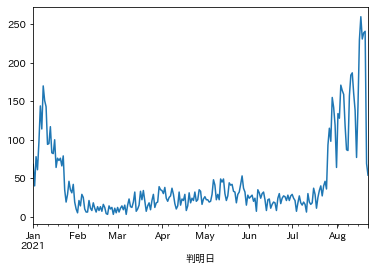

In [ ]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['番号'].plot()

In [ ]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['番号']

判明日
2021-01-01     68
2021-01-02     40
2021-01-03     78
2021-01-04     61
2021-01-05     97
             ... 
2021-08-19    231
2021-08-20    239
2021-08-21    241
2021-08-22     69
2021-08-23     54
Freq: D, Name: 番号, Length: 235, dtype: int64

<h1>今月のデータ</h1>

In [ ]:
dt_now = dt.datetime.now()
dt_now.month
corona_toYear=corona[corona['Year']==2021]
corona_toYear=corona_toYear[corona_toYear['Month']==8]

<h2>日別データ(今月)</h2>

<AxesSubplot:xlabel='判明日'>

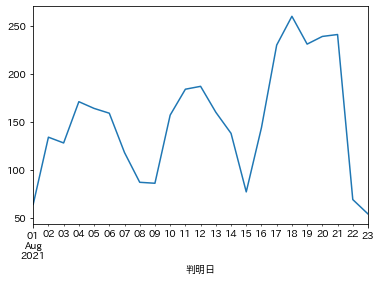

In [ ]:
corona_toYear.groupby(pandas.Grouper(key='判明日', freq='D')).count()['発症日'].plot()

<h2>居住地についての可視化(今月)</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

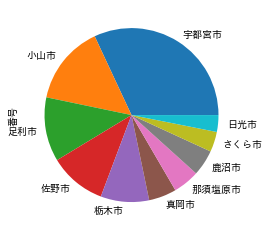

In [ ]:
corona_place=corona_toYear.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [ ]:
corona_place

居住地
宇都宮市     913
小山市      422
足利市      341
佐野市      303
栃木市      257
真岡市      147
那須塩原市    140
鹿沼市      138
さくら市     107
日光市       89
Name: 番号, dtype: int64

<h2>年齢についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

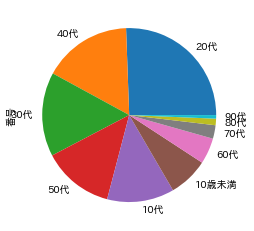

In [ ]:
corona_nen=corona_toYear.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [ ]:
corona_nen

年代
20代      889
40代      573
30代      543
50代      460
10代      434
10歳未満    257
60代      168
70代       87
80代       42
90代       23
Name: 番号, dtype: int64

<h2>性別についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

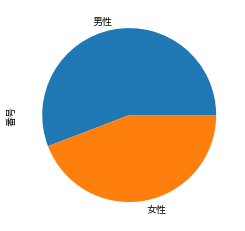

In [ ]:
corona_sei=corona_toYear.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)

<h2>ちょこっと分析</h2>

In [ ]:
corona['年代'].unique()

array(['10歳未満', '40代', '10代', '20代', '30代', '60代', '50代', '80代', '70代',
       '現在調査中', '非公表', '90代', '90歳以上', '100歳以上'], dtype=object)

IndexError: index 2 is out of bounds for axis 1 with size 2

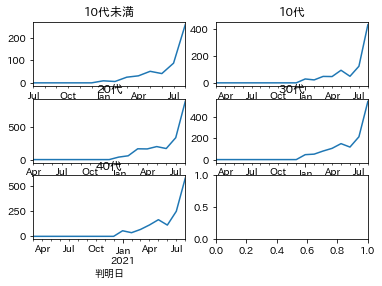

In [ ]:
corona=corona1
fig, axes = plt.subplots(nrows=3, ncols=2)
co_10s=corona[corona['年代']=='10歳未満']
co_10=corona[corona['年代']=='10代']
co_20=corona[corona['年代']=='20代']
co_30=corona[corona['年代']=='30代']
co_40=corona[corona['年代']=='40代']
co_50=corona[corona['年代']=='50代']
